<a href="https://colab.research.google.com/github/aboukric/ML-Brazil-weather-data/blob/main/weather_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thanks to **Concordia University** for giving me access to **University of Alberta** GPU

In [ ]:
# Import libraries.
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.style.use("default")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

**Load data one by one to use less RAM**

In [ ]:
df0 = pd.read_csv('central_west.csv')
#drop any NaN value
df0 = df0.dropna()

In [ ]:
# drop the first letter from the station code se we can have nimbers only
# this will be usfull to cahnge it to int
df0["station_code"] = df0["station_code"].str[1:]

In [ ]:
df1 = pd.read_csv('north.csv')
df1 = df1.dropna()

In [ ]:
df1["station_code"] = df1["station_code"].str[1:]

In [ ]:
df2 = pd.read_csv('northeast.csv')
df2 = df2.dropna()

In [ ]:
df2["station_code"] = df2["station_code"].str[1:]

In [ ]:
df3 = pd.read_csv('south.csv')
df3 = df3.dropna()

In [ ]:
df3["station_code"] = df3["station_code"].str[1:]

In [ ]:
df4 = pd.read_csv('southeast.csv')
df4 = df4.dropna()

In [ ]:
df4["station_code"] = df4["station_code"].str[1:]

In [ ]:
#df5 = pd.read_csv('stations.csv')

In [ ]:
#df5

**creat a single dataframe**

In [ ]:
df = [df0, df1,df2, df3,df4]

In [ ]:
df = pd.concat([df0, df1,df2, df3, df4],ignore_index=True)

In [ ]:
#df.info()
df.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,138998,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,26.5,24.4,18.3,16.5,65.0,57.0,59.0,39.0,9.6,3.9,CO,DF,PARANOA (COOPA-DF),047,-16.011111,-47.5575,1043.0
1,138999,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,26.7,25.4,17.9,16.0,60.0,52.0,54.0,55.0,8.3,3.4,CO,DF,PARANOA (COOPA-DF),047,-16.011111,-47.5575,1043.0
2,139000,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,27.6,25.9,17.1,14.5,56.0,45.0,49.0,62.0,8.3,3.6,CO,DF,PARANOA (COOPA-DF),047,-16.011111,-47.5575,1043.0
3,139001,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,28.5,26.6,17.6,12.9,53.0,41.0,41.0,43.0,6.7,3.1,CO,DF,PARANOA (COOPA-DF),047,-16.011111,-47.5575,1043.0
4,139002,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,28.9,27.4,15.6,12.4,45.0,39.0,43.0,98.0,6.4,3.5,CO,DF,PARANOA (COOPA-DF),047,-16.011111,-47.5575,1043.0


In [ ]:
df.tail()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
23481038,226417,2008-01-16,09:00,0.0,954.7,954.7,953.7,7.0,21.8,17.3,22.4,21.8,17.3,17.1,76.0,72.0,75.0,79.0,7.4,3.0,SE,MG,PIRAPORA,545,-17.257778,-44.835556,503.0
23481039,226418,2008-01-16,10:00,0.0,955.2,955.3,954.7,306.0,22.7,17.6,22.7,21.6,17.8,17.2,77.0,72.0,73.0,74.0,6.0,3.6,SE,MG,PIRAPORA,545,-17.257778,-44.835556,503.0
23481040,226419,2008-01-16,11:00,0.0,955.4,955.4,955.2,818.0,24.0,17.2,24.0,22.7,18.0,17.2,74.0,66.0,66.0,80.0,9.8,6.2,SE,MG,PIRAPORA,545,-17.257778,-44.835556,503.0
23481041,226420,2008-01-16,12:00,0.0,955.8,955.9,955.4,1987.0,25.7,17.8,25.7,23.9,18.2,17.1,67.0,60.0,62.0,76.0,9.8,5.0,SE,MG,PIRAPORA,545,-17.257778,-44.835556,503.0
23481042,226421,2008-01-16,13:00,0.0,955.6,955.9,955.6,3151.0,27.4,17.2,27.6,25.3,18.6,17.0,63.0,53.0,54.0,64.0,8.6,4.7,SE,MG,PIRAPORA,545,-17.257778,-44.835556,503.0


In [ ]:
# change column name to Englist
df.columns = ['index','Date (YYYY-MM-DD)', 'Time (HH:00)', 'Amount of precipitation in millimetres (last hour)', 'Atmospheric pressure at station level (mb)',
             'Maximum air pressure for the last hour (mb)','Minimum air pressure for the last hour (mb)','Solar radiation (KJ/m2)','Air temperature (instant) (°c)',
             'Dew point temperature (instant) (°c)','Maximum temperature for the last hour (°c)','Minimum temperature for the last hour (°c)',
              'Maximum dew point temperature for the last hour (°c)','Minimum dew point temperature for the last hour (°c)','Maximum relative humid temperature for the last hour (%)',
              'Minimum relative humid temperature for the last hour (%)','Relative humid (% instant)','Wind direction (radius degrees (0-360))','Wind gust in metres per second',
              'Wind speed in metres per second','Brazilian geopolitical regions','State (Province)','Station Name (usually city location or nickname)','Station code (INMET number)',
              'Latitude','Longitude','Elevation']
# Show data info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481043 entries, 0 to 23481042
Data columns (total 27 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   index                                                     int64  
 1   Date (YYYY-MM-DD)                                         object 
 2   Time (HH:00)                                              object 
 3   Amount of precipitation in millimetres (last hour)        float64
 4   Atmospheric pressure at station level (mb)                float64
 5   Maximum air pressure for the last hour (mb)               float64
 6   Minimum air pressure for the last hour (mb)               float64
 7   Solar radiation (KJ/m2)                                   float64
 8   Air temperature (instant) (°c)                            float64
 9   Dew point temperature (instant) (°c)                      float64
 10  Maximum temperature for the 

In [ ]:
#order the data based on time
df.index.name = None
df = df.sort_values(by=['Date (YYYY-MM-DD)'], ascending=[True])
df.head()


,index,Date (YYYY-MM-DD),Time (HH:00),Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Brazilian geopolitical regions,State (Province),Station Name (usually city location or nickname),Station code (INMET number),Latitude,Longitude,Elevation
21687340,0,2000-05-07,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,601,-22.8,-43.683333,33.0
21687363,23,2000-05-07,23:00,0.0,1014.3,1014.4,1013.7,-9999.0,21.8,16.9,22.2,21.7,17.6,16.4,77.0,70.0,74.0,224.0,6.8,1.1,SE,RJ,ECOLOGIA AGRICOLA,601,-22.8,-43.683333,33.0
21687362,22,2000-05-07,22:00,0.0,1013.7,1013.8,1013.0,-9999.0,21.7,17.6,21.9,21.6,17.7,17.4,78.0,76.0,77.0,199.0,3.3,1.6,SE,RJ,ECOLOGIA AGRICOLA,601,-22.8,-43.683333,33.0
21687361,21,2000-05-07,21:00,0.0,1013.1,1013.1,1012.6,1.0,21.7,17.4,22.0,21.7,17.5,16.7,77.0,72.0,77.0,155.0,3.1,0.6,SE,RJ,ECOLOGIA AGRICOLA,601,-22.8,-43.683333,33.0
21687360,20,2000-05-07,20:00,0.0,1012.5,1012.5,1012.1,142.0,22.0,16.9,22.6,22.0,17.6,16.8,74.0,71.0,73.0,214.0,4.6,1.5,SE,RJ,ECOLOGIA AGRICOLA,601,-22.8,-43.683333,33.0


In [ ]:
#df.tail()

In [ ]:
df.drop(["Time (HH:00)", "Brazilian geopolitical regions", "Station Name (usually city location or nickname)", "State (Province)", "index"], axis=1, inplace=True)

# # Get data from '2017-05-07'. If we have very large RAM we can use the whol data
mask = (df['Date (YYYY-MM-DD)'] > '2017-05-07')
df = df.loc[mask]
df.head()

,Date (YYYY-MM-DD),Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
14551694,2017-05-08,-9999.0,995.0,995.2,994.5,-9999.0,28.6,21.4,29.7,28.6,22.0,21.4,66.0,63.0,65.0,80.0,1.9,0.5,225,-5.555556,-47.459722,126.0
14551693,2017-05-08,-9999.0,995.0,994.5,993.7,162.0,29.7,22.1,32.1,29.7,22.3,21.3,64.0,53.0,64.0,42.0,2.7,0.1,225,-5.555556,-47.459722,126.0
14551692,2017-05-08,-9999.0,994.0,993.7,993.5,955.0,32.1,21.4,34.0,32.1,22.1,20.5,53.0,47.0,53.0,76.0,5.0,1.2,225,-5.555556,-47.459722,126.0
14551681,2017-05-08,-9999.0,996.0,995.6,995.2,-9999.0,22.9,21.5,22.9,22.4,21.6,21.0,92.0,92.0,92.0,130.0,0.0,0.0,225,-5.555556,-47.459722,126.0
14551682,2017-05-08,-9999.0,996.0,996.3,995.6,93.0,23.5,22.2,23.5,22.8,22.2,21.5,92.0,92.0,92.0,261.0,0.0,0.0,225,-5.555556,-47.459722,126.0


In [ ]:
# choose date as index
df = df.set_index('Date (YYYY-MM-DD)')

In [ ]:
df.tail()

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
Date (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,,,
2021-04-30,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,345,-9.033333,-42.701111,383.13
2021-04-30,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,345,-9.033333,-42.701111,383.13
2021-04-30,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,345,-9.033333,-42.701111,383.13
2021-04-30,0.0,1015.0,1014.9,1014.8,-9999.0,26.7,-9999.0,-9999.0,26.1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,192.0,4.2,1.1,409,-10.952500,-37.054444,3.72
2021-04-30,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,238,-4.320597,-46.449503,174.91


In [ ]:
#change the Station code to int
df['Station code (INMET number)'] = pd.to_numeric(df['Station code (INMET number)'])

In [ ]:
#change -9999 to NaN so we can count them
df = df.replace(-9999.0, np.NaN)

In [ ]:
df.tail()

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
Date (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,,,
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345,-9.033333,-42.701111,383.13
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345,-9.033333,-42.701111,383.13
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345,-9.033333,-42.701111,383.13
2021-04-30,0.0,1015.0,1014.9,1014.8,NaN,26.7,NaN,NaN,26.1,NaN,NaN,NaN,NaN,NaN,192.0,4.2,1.1,409,-10.952500,-37.054444,3.72
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238,-4.320597,-46.449503,174.91


## Checking for missing values

In [ ]:
columnsNanVal = df.isna().sum()
columnsNanVal

Amount of precipitation in millimetres (last hour)          1497549
Atmospheric pressure at station level (mb)                  1034936
Maximum air pressure for the last hour (mb)                 1039198
Minimum air pressure for the last hour (mb)                 1039277
Solar radiation (KJ/m2)                                     3481400
Air temperature (instant) (°c)                              1024004
Dew point temperature (instant) (°c)                        1219393
Maximum temperature for the last hour (°c)                  1031072
Minimum temperature for the last hour (°c)                  1028683
Maximum dew point temperature for the last hour (°c)        1225255
Minimum dew point temperature for the last hour (°c)        1230341
Maximum relative humid temperature for the last hour (%)    1218529
Minimum relative humid temperature for the last hour (%)    1225345
Relative humid (% instant)                                  1215133
Wind direction (radius degrees (0-360))         

In [ ]:
# Columns with missing values
colMissVal = df.columns[columnsNanVal != 0].tolist()

In [ ]:
# Check the missing values by station
dfCheck = df[colMissVal].isna().groupby(df["Station code (INMET number)"]).sum()

In [ ]:
dfCheck

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Elevation
Station code (INMET number),,,,,,,,,,,,,,,,,,
1,48,48,50,50,4083,48,48,50,50,50,50,50,50,48,49,50,49,0
2,196,1,1,1,9137,1,1,1,1,1,1,1,1,6,1,1,1,0
3,5,5,7,7,4105,5,853,7,7,921,921,912,913,853,5,7,5,0
5,72,72,72,72,5267,72,72,72,72,72,72,72,75,73,72,72,72,0
11,672,0,0,0,4108,0,0,0,0,0,0,0,0,0,0,1,0,0
12,1,1,1,1,6677,1,1,1,1,1,1,1,2,1,1,1,1,0
13,814,814,825,825,8588,814,814,826,825,825,825,825,836,820,814,829,814,0
14,725,612,606,606,7055,606,606,606,606,606,606,606,624,609,606,607,606,0
15,0,0,0,0,4109,0,0,0,0,0,0,0,0,0,0,1,0,0


## Station 353 has the highest missing values across all columns
so we will analysis **station 353**  

In [ ]:
# Select data from station 353.
statio353 = df[df['Station code (INMET number)'] == 353].copy()
statio353.head()

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
Date (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,,,
2017-05-08,NaN,984.0,984.5,983.8,4808.0,30.2,17.1,30.2,27.0,18.3,15.8,57.0,42.0,46.0,150.0,5.8,0.0,353,-9.804167,-36.618889,241.0
2017-05-08,NaN,985.0,985.4,984.5,4502.0,27.2,17.1,29.8,27.2,17.4,15.4,54.0,43.0,54.0,127.0,6.7,1.7,353,-9.804167,-36.618889,241.0
2017-05-08,NaN,985.0,984.6,983.8,4953.0,26.0,17.0,27.6,26.0,17.3,16.5,57.0,52.0,57.0,130.0,7.3,1.3,353,-9.804167,-36.618889,241.0
2017-05-08,NaN,985.0,985.3,984.6,3043.0,25.2,17.7,26.0,25.2,17.7,16.8,63.0,57.0,63.0,117.0,6.0,0.4,353,-9.804167,-36.618889,241.0
2017-05-08,NaN,986.0,986.0,985.4,NaN,24.9,17.7,25.3,24.9,18.1,17.7,65.0,63.0,64.0,108.0,6.0,0.0,353,-9.804167,-36.618889,241.0


In [ ]:
statio353.tail()

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
Date (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,,,
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353,-9.804444,-36.619167,236.84
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353,-9.804444,-36.619167,236.84
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353,-9.804444,-36.619167,236.84
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353,-9.804444,-36.619167,236.84
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353,-9.804444,-36.619167,236.84


In [ ]:
statio353.isna().sum()

Amount of precipitation in millimetres (last hour)          26376
Atmospheric pressure at station level (mb)                  15579
Maximum air pressure for the last hour (mb)                 15591
Minimum air pressure for the last hour (mb)                 15591
Solar radiation (KJ/m2)                                     28752
Air temperature (instant) (°c)                              15578
Dew point temperature (instant) (°c)                        15578
Maximum temperature for the last hour (°c)                  15591
Minimum temperature for the last hour (°c)                  15591
Maximum dew point temperature for the last hour (°c)        15591
Minimum dew point temperature for the last hour (°c)        15591
Maximum relative humid temperature for the last hour (%)    15591
Minimum relative humid temperature for the last hour (%)    15594
Relative humid (% instant)                                  15578
Wind direction (radius degrees (0-360))                     15578
Wind gust 

## Cleaning the dataset.

There is some value that can't be negative so we will fill them with 0

In [ ]:
# give names to values to be changed
canBeZero = ["Solar radiation (KJ/m2)", "Amount of precipitation in millimetres (last hour)", 'Wind gust in metres per second', 'Wind gust in metres per second']  # Solar radiation (KJ/m2), Amount of precipitation in millimetres (last hour), Wind gust in metres per second, Wind gust in metres per second
OtherColumns = ['Atmospheric pressure at station level (mb)','Maximum air pressure for the last hour (mb)','Minimum air pressure for the last hour (mb)',
                'Air temperature (instant) (°c)','Dew point temperature (instant) (°c)','Maximum temperature for the last hour (°c)',
                'Minimum temperature for the last hour (°c)','Maximum dew point temperature for the last hour (°c)','Minimum dew point temperature for the last hour (°c)',
                'Maximum relative humid temperature for the last hour (%)','Minimum relative humid temperature for the last hour (%)','Relative humid (% instant)',
                'Wind direction (radius degrees (0-360))','Station code (INMET number)'] 

In [ ]:
# Fill missing values that can't be negative with zeros
statio353[canBeZero] = statio353[canBeZero].fillna(0)
statio353.head()

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
Date (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,,,
2017-05-08,0.0,984.0,984.5,983.8,4808.0,30.2,17.1,30.2,27.0,18.3,15.8,57.0,42.0,46.0,150.0,5.8,0.0,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,985.4,984.5,4502.0,27.2,17.1,29.8,27.2,17.4,15.4,54.0,43.0,54.0,127.0,6.7,1.7,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,984.6,983.8,4953.0,26.0,17.0,27.6,26.0,17.3,16.5,57.0,52.0,57.0,130.0,7.3,1.3,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,985.3,984.6,3043.0,25.2,17.7,26.0,25.2,17.7,16.8,63.0,57.0,63.0,117.0,6.0,0.4,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,986.0,986.0,985.4,0.0,24.9,17.7,25.3,24.9,18.1,17.7,65.0,63.0,64.0,108.0,6.0,0.0,353,-9.804167,-36.618889,241.0


In [ ]:
# Interpolate the other missing values
statio353df = statio353.interpolate(method ='linear', limit_direction ='forward', axis=0)
statio353df.tail()

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
Date (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,,,
2021-04-30,0.0,989.0,989.4,989.1,0.0,27.2,23.3,27.3,25.7,25.6,23.3,94.0,79.0,79.0,360.0,0.0,0.0,353,-9.804444,-36.619167,236.84
2021-04-30,0.0,989.0,989.4,989.1,0.0,27.2,23.3,27.3,25.7,25.6,23.3,94.0,79.0,79.0,360.0,0.0,0.0,353,-9.804444,-36.619167,236.84
2021-04-30,0.0,989.0,989.4,989.1,0.0,27.2,23.3,27.3,25.7,25.6,23.3,94.0,79.0,79.0,360.0,0.0,0.0,353,-9.804444,-36.619167,236.84
2021-04-30,0.0,989.0,989.4,989.1,0.0,27.2,23.3,27.3,25.7,25.6,23.3,94.0,79.0,79.0,360.0,0.0,0.0,353,-9.804444,-36.619167,236.84
2021-04-30,0.0,989.0,989.4,989.1,0.0,27.2,23.3,27.3,25.7,25.6,23.3,94.0,79.0,79.0,360.0,0.0,0.0,353,-9.804444,-36.619167,236.84


In [ ]:
statio353df.isna().sum()

Amount of precipitation in millimetres (last hour)          0
Atmospheric pressure at station level (mb)                  0
Maximum air pressure for the last hour (mb)                 0
Minimum air pressure for the last hour (mb)                 0
Solar radiation (KJ/m2)                                     0
Air temperature (instant) (°c)                              0
Dew point temperature (instant) (°c)                        0
Maximum temperature for the last hour (°c)                  0
Minimum temperature for the last hour (°c)                  0
Maximum dew point temperature for the last hour (°c)        0
Minimum dew point temperature for the last hour (°c)        0
Maximum relative humid temperature for the last hour (%)    0
Minimum relative humid temperature for the last hour (%)    0
Relative humid (% instant)                                  0
Wind direction (radius degrees (0-360))                     0
Wind gust in metres per second                              0
Wind spe

In [ ]:
SHAPE = statio353df.shape

In [ ]:
# Select rows with all feature columns equal to zero.
feature_columns = ['Atmospheric pressure at station level (mb)','Maximum air pressure for the last hour (mb)','Minimum air pressure for the last hour (mb)',
                'Air temperature (instant) (°c)','Dew point temperature (instant) (°c)','Maximum temperature for the last hour (°c)',
                'Minimum temperature for the last hour (°c)','Maximum dew point temperature for the last hour (°c)','Minimum dew point temperature for the last hour (°c)',
                'Maximum relative humid temperature for the last hour (%)','Minimum relative humid temperature for the last hour (%)','Relative humid (% instant)',
                'Wind direction (radius degrees (0-360))','Station code (INMET number)']
statio353data = statio353df[(statio353df[feature_columns] != 0).any(axis=1)]
statio353data.head()

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Dew point temperature (instant) (°c),Maximum temperature for the last hour (°c),Minimum temperature for the last hour (°c),Maximum dew point temperature for the last hour (°c),Minimum dew point temperature for the last hour (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
Date (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,,,
2017-05-08,0.0,984.0,984.5,983.8,4808.0,30.2,17.1,30.2,27.0,18.3,15.8,57.0,42.0,46.0,150.0,5.8,0.0,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,985.4,984.5,4502.0,27.2,17.1,29.8,27.2,17.4,15.4,54.0,43.0,54.0,127.0,6.7,1.7,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,984.6,983.8,4953.0,26.0,17.0,27.6,26.0,17.3,16.5,57.0,52.0,57.0,130.0,7.3,1.3,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,985.3,984.6,3043.0,25.2,17.7,26.0,25.2,17.7,16.8,63.0,57.0,63.0,117.0,6.0,0.4,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,986.0,986.0,985.4,0.0,24.9,17.7,25.3,24.9,18.1,17.7,65.0,63.0,64.0,108.0,6.0,0.0,353,-9.804167,-36.618889,241.0


In [ ]:
SHAPE, statio353data.shape

((34896, 21), (34896, 21))

In [ ]:
statio353data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34896 entries, 2017-05-08 to 2021-04-30
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Amount of precipitation in millimetres (last hour)        34896 non-null  float64
 1   Atmospheric pressure at station level (mb)                34896 non-null  float64
 2   Maximum air pressure for the last hour (mb)               34896 non-null  float64
 3   Minimum air pressure for the last hour (mb)               34896 non-null  float64
 4   Solar radiation (KJ/m2)                                   34896 non-null  float64
 5   Air temperature (instant) (°c)                            34896 non-null  float64
 6   Dew point temperature (instant) (°c)                      34896 non-null  float64
 7   Maximum temperature for the last hour (°c)                34896 non-null  float64
 8   Minimum

# Cleaning for Prediction.

In [ ]:
st353PredictDf = statio353data.drop(['Dew point temperature (instant) (°c)','Maximum temperature for the last hour (°c)',
                      'Minimum temperature for the last hour (°c)','Maximum dew point temperature for the last hour (°c)',
                      'Minimum dew point temperature for the last hour (°c)'], axis=1)

In [ ]:
st353PredictDf.head()

,Amount of precipitation in millimetres (last hour),Atmospheric pressure at station level (mb),Maximum air pressure for the last hour (mb),Minimum air pressure for the last hour (mb),Solar radiation (KJ/m2),Air temperature (instant) (°c),Maximum relative humid temperature for the last hour (%),Minimum relative humid temperature for the last hour (%),Relative humid (% instant),Wind direction (radius degrees (0-360)),Wind gust in metres per second,Wind speed in metres per second,Station code (INMET number),Latitude,Longitude,Elevation
Date (YYYY-MM-DD),,,,,,,,,,,,,,,,
2017-05-08,0.0,984.0,984.5,983.8,4808.0,30.2,57.0,42.0,46.0,150.0,5.8,0.0,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,985.4,984.5,4502.0,27.2,54.0,43.0,54.0,127.0,6.7,1.7,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,984.6,983.8,4953.0,26.0,57.0,52.0,57.0,130.0,7.3,1.3,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,985.0,985.3,984.6,3043.0,25.2,63.0,57.0,63.0,117.0,6.0,0.4,353,-9.804167,-36.618889,241.0
2017-05-08,0.0,986.0,986.0,985.4,0.0,24.9,65.0,63.0,64.0,108.0,6.0,0.0,353,-9.804167,-36.618889,241.0


In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns
 
# #without regression
# sns.pairplot(st353PredictDf, kind="scatter")
# plt.show()

**Seaborn Correlation Heatmap**

Thank to 'https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e'

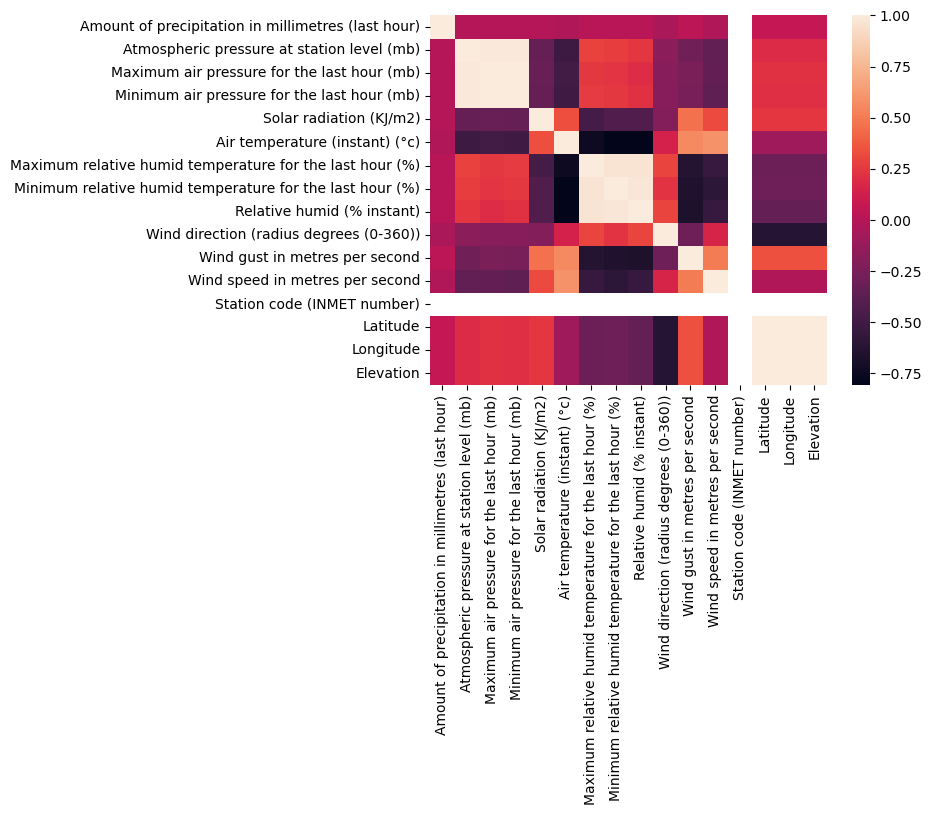

In [ ]:
sns.heatmap(st353PredictDf.corr());

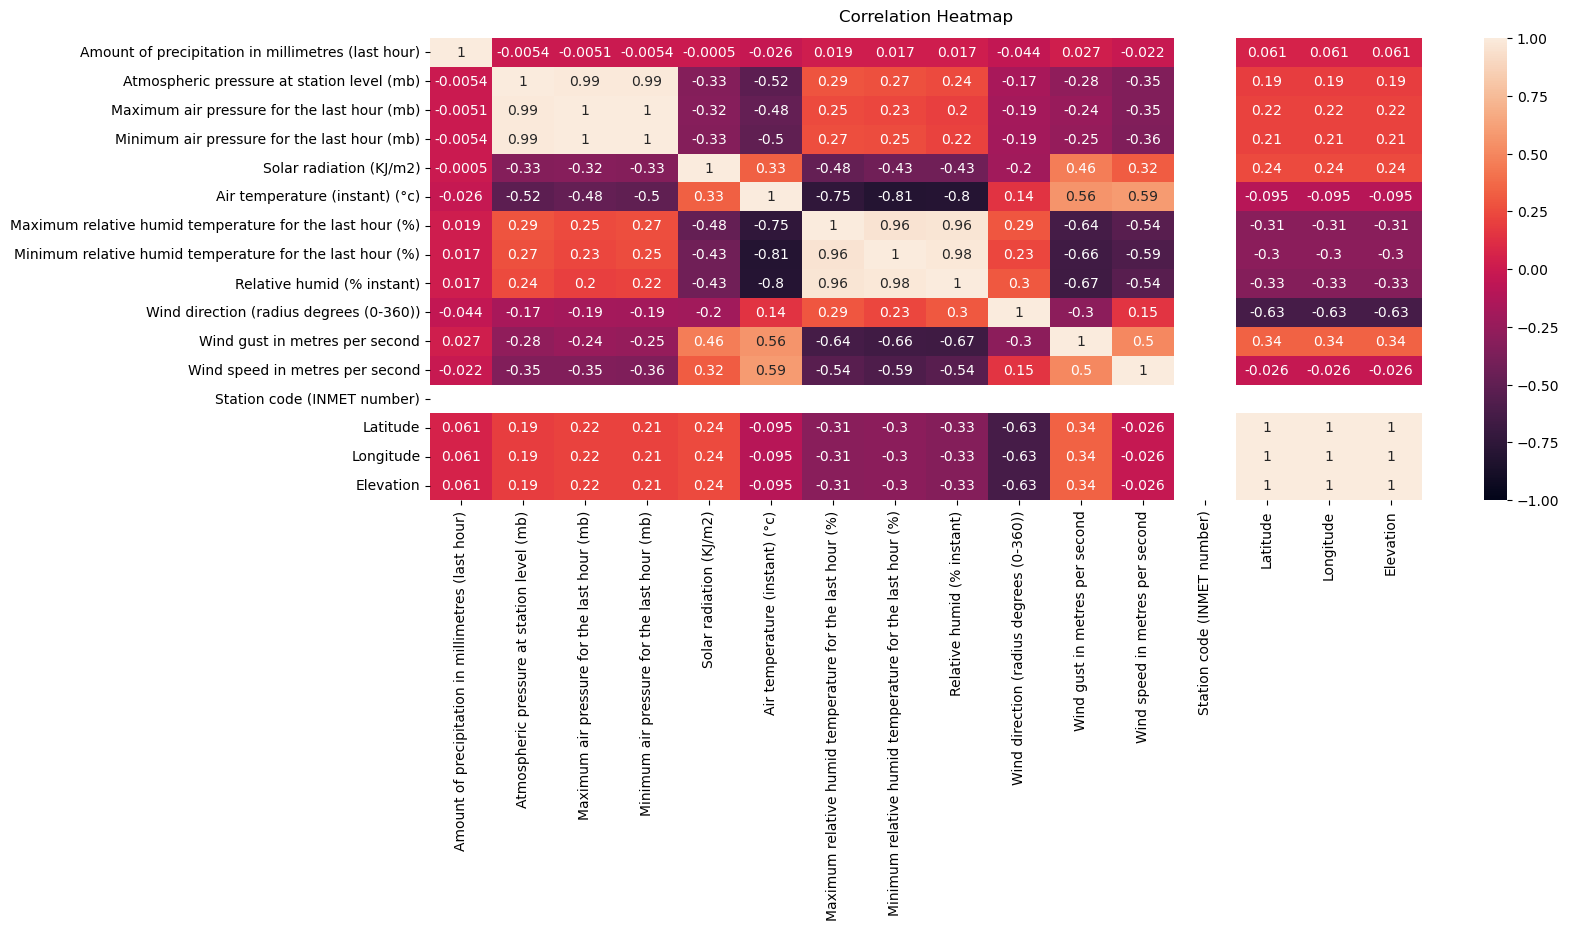

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(st353PredictDf.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Training the model, and train test split using pandas**

Thanks to 'https://www.codegrepper.com/code-examples/python/train_test_split+pandas'

In [ ]:
#from sklearn.model_selection import train_test_split

X = st353PredictDf.drop(["Air temperature (instant) (°c)"],axis=1).values   # independant features
y = st353PredictDf["Air temperature (instant) (°c)"].values					# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26172, 15), (8724, 15), (26172,), (8724,))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification


# X_train, y_train = make_classification(n_samples=1000,n_features=4,
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)

# clf.fit(X_train, y_train)

# print(clf.predict([[0, 0, 0, 0]]))

In [ ]:
# Define the model
model = RandomForestRegressor(n_estimators=100)
# Train
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# disply the accuracy of train dataset.
print("the accuracy of train dataset is: ",model.score(X_train, y_train))
print("the accuracy of the test dataset is: ",model.score(X_test, y_test) )

the accuracy of train dataset is:  0.9916935217461406
the accuracy of the test dataset is:  0.9444138938418206
